# 1.importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px
import plotly.io as pio

pio.renderers.default="svg"

# 2.Importing the dataset

In [2]:
raw_df=pd.read_csv("Zomato Chennai Listing 2020.csv")

In [3]:
raw_df.head()

Zomato URL     Name of Restaurant  \
0  https://www.zomato.com/chennai/yaa-mohaideen-b...  Yaa Mohaideen Briyani   
1  https://www.zomato.com/chennai/sukkubhai-biriy...     Sukkubhai Biriyani   
2  https://www.zomato.com/chennai/ss-hyderabad-bi...   SS Hyderabad Biryani   
3        https://www.zomato.com/chennai/kfc-perambur                    KFC   
4  https://www.zomato.com/chennai/tasty-kitchen-p...          Tasty Kitchen   

                                             Address     Location  \
0          336 & 338, Main Road, Pallavaram, Chennai   Pallavaram   
1   New 14, Old 11/3Q, Railway Station Road, MKN ...      Alandur   
2   98/339, Arcot Road, Opposite Gokulam Chit Fun...  Kodambakkam   
3   10, Periyar Nagar, 70 Feet Road, Near Sheeba ...     Perambur   
4   135B, SRP Colony, Peravallur, Near Perambur, ...     Perambur   

                                             Cuisine  \
0                                        ['Biryani']   
1  ['Biryani', ' North Indian', ' Mughlai', ' Des...   
2  ['Biryani', ' North Indian', ' Chinese', ' Ara...   
3  ['Burger', ' Fast Food', ' Finger Food', ' Bev...   
4  ['Chinese', ' Biryani', ' North Indian', ' Che...   

                                          Top Dishes  Price for 2  \
0  ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...        500.0   
1  ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   
2  ['Brinjal Curry', ' Tandoori Chicken', ' Chick...        500.0   
3                                  ['Zinger Burger']        500.0   
4  ['Mutton Biryani', ' Chicken Rice', ' Tomato R...        450.0   

  Dining Rating Dining Rating Count Delivery Rating Delivery Rating Count  \
0           4.3                1500             4.3                  9306   
1           4.4                3059             4.1                 39200   
2           4.3                1361             4.4                 10500   
3           4.0                1101             4.0                 11200   
4           4.2                 617             4.1                 22400   

                                            Features  
0                ['Home Delivery', 'Indoor Seating']  
1  ['Home Delivery', 'Free Parking', 'Table booki...  
2                ['Home Delivery', 'Indoor Seating']  
3  ['Home Delivery', 'Free Parking', 'Card Upon D...  
4                ['Home Delivery', 'Indoor Seating']

# 3.Getting basic information about the dataset

In [4]:
raw_df.shape

(12032, 12)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
Zomato URL               12032 non-null object
Name of Restaurant       12032 non-null object
Address                  12032 non-null object
Location                 12032 non-null object
Cuisine                  12032 non-null object
Top Dishes               12032 non-null object
Price for 2              12032 non-null float64
Dining Rating            12032 non-null object
Dining Rating Count      12032 non-null object
Delivery Rating          12032 non-null object
Delivery Rating Count    12032 non-null object
Features                 12032 non-null object
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [6]:
raw_df.describe()

Price for 2
count  12032.000000
mean     397.611370
std      332.045938
min       40.000000
25%      200.000000
50%      300.000000
75%      450.000000
max     5000.000000

# Cleaning the dataset


# 4.checking the null records

In [7]:
#checking hte null records
raw_df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [8]:
zomato_df=raw_df

# Q1) How many restaurants are in Mumbai for each type of cuisine?


In [9]:
fig = px.histogram(
    zomato_df,
    x='Cuisine',
    color='Cuisine',
    title='No. of Restaurants by Cuisine Type',
    labels={'Cuisine': 'Cuisine'}
)

# Show the plot
fig.show()

# Q2) What are the percentage of restaurants by Rating Type in chennai?

In [10]:
rating_type_df = zomato_df['Dining Rating'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'Dining Rating', 'Dining Rating':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df

Dining Rating  COUNT OF RESTAURANTS
0           None                  5351
1            3.6                   584
2            3.5                   553
3            3.7                   525
4            3.4                   500
5            3.3                   463
6            3.8                   460
7            3.2                   433
8            3.9                   379
9            3.1                   363
10           2.0                   354
11           3.0                   302
12           4.0                   288
13           2.9                   257
14           4.1                   221
15           2.8                   192
16           4.2                   142
17           2.7                   138
18           4.3                   105
19           2.6                    99
20           2.5                    71
21           4.4                    61
22           2.4                    46
23           4.5                    36
24           2.3                    32
25           2.2                    20
26           4.6                    17
27           4.7                    12
28           2.1                    10
29           4.9                     7
30           4.8                     4
31           1.9                     3
32           1.7                     2
33           0.3                     1
34           1.0                     1

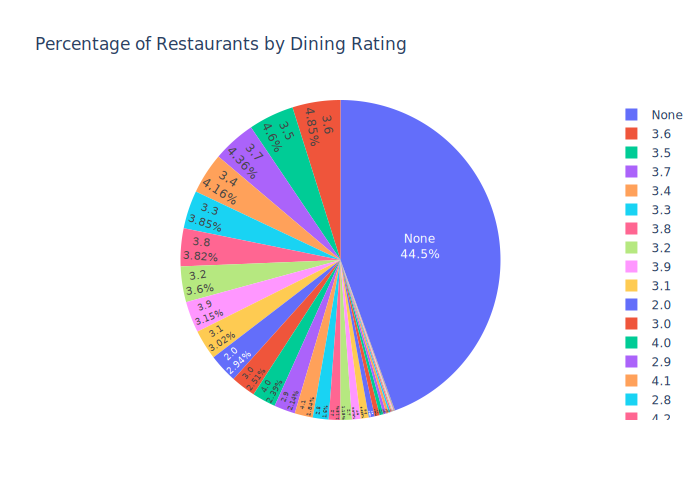

In [11]:
fig = px.pie(rating_type_df, names='Dining Rating', values='COUNT OF RESTAURANTS', color='Dining Rating',
 title='Percentage of Restaurants by Dining Rating').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Q3) Which are the Top 10 highest rated Biriyani Restaurant in chennai?



In [12]:
zomato_df['Top Dishes']

0        ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...
1        ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...
2        ['Brinjal Curry', ' Tandoori Chicken', ' Chick...
3                                        ['Zinger Burger']
4        ['Mutton Biryani', ' Chicken Rice', ' Tomato R...
                               ...                        
12027                                              Invalid
12028                                              Invalid
12029                                              Invalid
12030                                              Invalid
12031                                              Invalid
Name: Top Dishes, Length: 12032, dtype: object

In [13]:
biriyani_df = zomato_df[zomato_df['Top Dishes'].str.contains('Biryani')]
biriyani_df.sort_values(by='Dining Rating',ascending=False).head(10)

Zomato URL  \
10778  https://www.zomato.com/chennai/the-good-bowl-k...   
9426   https://www.zomato.com/chennai/behrouz-biryani...   
9424   https://www.zomato.com/chennai/behrouz-biryani...   
9423   https://www.zomato.com/chennai/behrouz-biryani...   
602    https://www.zomato.com/chennai/kerala-mess-tho...   
77     https://www.zomato.com/chennai/al-dhareeq-beef...   
285    https://www.zomato.com/chennai/behrouz-biryani...   
463    https://www.zomato.com/chennai/kolapasi-takeaw...   
274    https://www.zomato.com/chennai/chennight-resta...   
307          https://www.zomato.com/chennai/faasos-porur   

             Name of Restaurant  \
10778             The Good Bowl   
9426            Behrouz Biryani   
9424            Behrouz Biryani   
9423            Behrouz Biryani   
602                 Kerala Mess   
77     Al Dhareeq Beef Biriyani   
285             Behrouz Biryani   
463           Kolapasi Takeaway   
274        Chennight Restaurant   
307                      Faasos   

                                                 Address         Location  \
10778   64, Block 97, First Floor, Above Bank of Baro...          Kilpauk   
9426                                  Chromepet, Chennai        Chromepet   
9424                                       Delivery Only        Velachery   
9423                                      Porur, Chennai            Porur   
602     37, Aziz Mulk, 1st Street, Thousand Lights, C...  Thousand Lights   
77      64/A, 162, Sivan Kovil South Street, Kodambak...      Kodambakkam   
285     19/8, Pushpa Nagar, Main Road, Nungambakkam, ...     Nungambakkam   
463      29, Door 5, Nelson Plaza, Aminijikarai, Chennai     Aminijikarai   
274     1, Bharathi Puram, Brewery Road, Shenoy Nagar...     Shenoy Nagar   
307     3, 15th Block, Mahalakshmi Nagar, Porur, Chennai            Porur   

                                                 Cuisine  \
10778           ['North Indian', ' Biryani', ' Italian']   
9426            ['Biryani', ' North Indian', ' Mughlai']   
9424            ['Biryani', ' North Indian', ' Mughlai']   
9423            ['Biryani', ' North Indian', ' Mughlai']   
602                          ['South Indian', ' Kerala']   
77                                           ['Biryani']   
285             ['Biryani', ' North Indian', ' Mughlai']   
463                         ['South Indian', ' Chinese']   
274                         ['Chinese', ' South Indian']   
307    ['Fast Food', ' North Indian', ' Biryani', ' R...   

                                              Top Dishes  Price for 2  \
10778                          ['Rice Bowl', ' Biryani']        500.0   
9426   ['Raita', ' Gulab Jamun', ' Basmati Rice', ' G...        700.0   
9424   ['Gulab Jamun', ' Basmati Rice', ' Raita', ' M...        700.0   
9423   ['Gulab Jamun', ' Gosht Dum Biryani', ' Falafe...        700.0   
602                 ['Fish', ' Beef Masala', ' Biryani']        200.0   
77                                      ['Beef Biryani']        300.0   
285    ['Gulab Jamun', ' Meatballs', ' Chicken Biryan...        700.0   
463    ['Chicken Chukka', ' Biryani', ' Fish Curry', ...        500.0   
274                        ['Shawarma Roll', ' Biryani']        400.0   
307    ['Chicken Wrap', ' Biryani', ' Paratha', ' Cho...        450.0   

      Dining Rating    Dining Rating Count Delivery Rating  \
10778          None  Does not offer Dining             4.2   
9426           None  Does not offer Dining             4.0   
9424           None  Does not offer Dining             3.8   
9423           None  Does not offer Dining             3.7   
602            None  Does not offer Dining             3.7   
77             None  Does not offer Dining             3.9   
285            None  Does not offer Dining             4.1   
463            None  Does not offer Dining             3.3   
274            None  Does not offer Dining             3.1   
307            None  Does not offer Dining             4.1   

   

# Q4) Which is the best  Features in Chennai?

#  Q5) Which places have the highest rated restaurant for each Cuisine  in chennai?

In [15]:
highest_rated_df = zomato_df[zomato_df['Price for 2'] >= 700]
highest_rated_df

Zomato URL  \
1      https://www.zomato.com/chennai/sukkubhai-biriy...   
7      https://www.zomato.com/chennai/cafe-arabica-an...   
8      https://www.zomato.com/chennai/savoury-sea-she...   
9      https://www.zomato.com/chennai/sangeetha-veg-r...   
11     https://www.zomato.com/chennai/kovai-alankar-v...   
...                                                  ...   
11789  https://www.zomato.com/chennai/house-of-candy-...   
12007     https://www.zomato.com/chennai/inlayers-egmore   
12008  https://www.zomato.com/chennai/inlayers-kodamb...   
12009  https://www.zomato.com/chennai/inlayers-ashok-...   
12010  https://www.zomato.com/chennai/inlayers-ekkadu...   

             Name of Restaurant  \
1            Sukkubhai Biriyani   
7                  Cafe Arabica   
8             Savoury Sea Shell   
9      Sangeetha Veg Restaurant   
11          Kovai Alankar Vilas   
...                         ...   
11789            House of Candy   
12007                  Inlayers   
12008                  Inlayers   
12009                  Inlayers   
12010                  Inlayers   

                                                 Address  \
1       New 14, Old 11/3Q, Railway Station Road, MKN ...   
7       3, E Block, 3rd Avenue, Anna Nagar East, Chennai   
8       3, E Block, 3rd Avenue, Anna Nagar East, Chennai   
9              102/82, GN Chetty Road, T. Nagar, Chennai   
11          AC 3, 2nd Avenue, Anna Nagar East, Chennai .   
...                                                  ...   
11789   183, 2nd Floor, Forum Mall, Arcot Road, NSK S...   
12007   150/28, 2/38, Cisons Complex, Montieth Road, ...   
12008   18, Shop 1, Ground Floor, Station View Road, ...   
12009   New 86, Old 72, Ground Floor, 4th Avenue, Ash...   
12010   21/10, Rajeswari Tower, Bungalow, 1st Street,...   

                            Location  \
1                            Alandur   
7                    Anna Nagar East   
8                    Anna Nagar East   
9                           T. Nagar   
11                   Anna Nagar East   
...                              ...   
11789  Forum Vijaya Mall, Vadapalani   
12007                         Egmore   
12008                    Kodambakkam   
12009                    Ashok Nagar   
12010                  Ekkaduthangal   

                                                 Cuisine  \
1      ['Biryani', ' North Indian', ' Mughlai', ' Des...   
7                                 ['Cafe', ' Fast Food']   
8      ['Arabian', ' Chinese', ' North Indian', ' Leb...   
9      ['South Indian', ' North Indian', ' Chinese', ...   
11                                      ['South Indian']   
...                                                  ...   
11789                                       ['Desserts']   
12007                            ['Bakery', ' Desserts']   
12008                            ['Bakery', ' Desserts']   
12009                            ['Bakery', ' Desserts']   
12010                            ['Bakery', ' Desserts']   

                                              Top Dishes  Price for 2  \
1      ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   
7      ['Burgers', ' Pasta', ' Sandwich', ' Strawberr...        800.0   
8      ['Shawarma', ' Chicken Grill', ' Brownie', ' S...       1400.0   
9      ['Filtered Coffee', ' Chaat', ' Faluda', ' Mas...        800.0   
11     ['Elaneer Payasam', ' Paratha', ' Mutton Chukk...        700.0   
...                                                  ...          ...   
11789                                            Invalid        800.0   
12007                                            Invalid        700.0   
12008                                            Invalid        700.0   
12009                                            Invalid        700.0   
12010                                            Invalid        700.0   

      Dining Rating        Dining Rating Count Delivery Rating  \
1               4.4                   

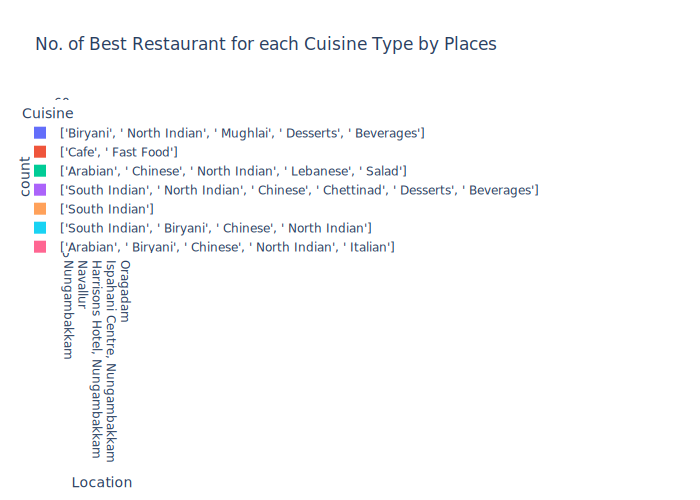

In [16]:
fig = px.histogram(highest_rated_df, x='Location', color='Cuisine',
 title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descending")
fig.show()

#  Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine in chennai?


In [17]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'Cuisine'])['Price for 2'].mean().reset_index()
highest_rated_price_df.head()

Location  \
0   InterContinental Chennai Mahabalipuram Resort...   
1                        Abu Sarovar Portico, Egmore   
2                                         Adambakkam   
3                                              Adyar   
4                                              Adyar   

                                         Cuisine  Price for 2  
0                                ['Finger Food']       1500.0  
1  ['North Indian', ' South Indian', ' Chinese']       1000.0  
2                      ['Chettinad', ' Chinese']        700.0  
3       ['Arabian', ' North Indian', ' Chinese']        800.0  
4                ['Asian', ' Chinese', ' Momos']        800.0

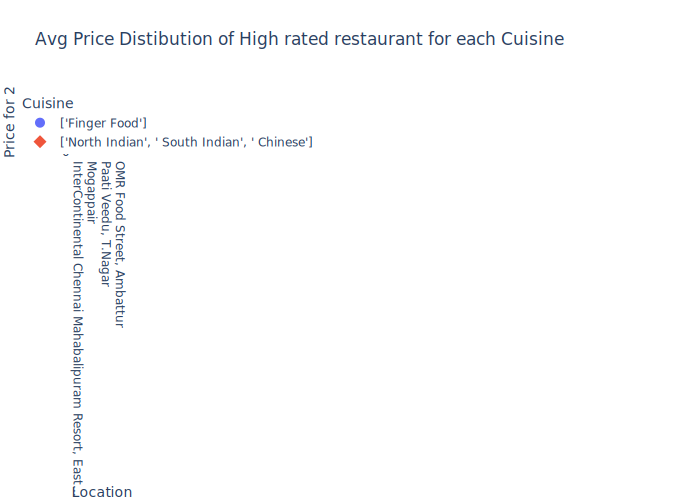

In [18]:
fig = px.scatter(highest_rated_price_df, x="Location", y="Price for 2", color="Cuisine", symbol="Cuisine",
 title=' Avg Price Distibution of High rated restaurant for each Cuisine').update_traces(marker_size=10)
fig.show()

# Q7) Which areas have a large number of Sukkubhai Biriyani of  Restaurant Market?

In [19]:
sukkubhai_Biriyani_Restaurant_df = zomato_df[zomato_df['Name of Restaurant'].str.contains('Sukkubhai Biriyani')]
sukkubhai_Biriyani_Restaurant_df

Zomato URL  Name of Restaurant  \
1  https://www.zomato.com/chennai/sukkubhai-biriy...  Sukkubhai Biriyani   

                                             Address Location  \
1   New 14, Old 11/3Q, Railway Station Road, MKN ...  Alandur   

                                             Cuisine  \
1  ['Biryani', ' North Indian', ' Mughlai', ' Des...   

                                          Top Dishes  Price for 2  \
1  ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   

  Dining Rating Dining Rating Count Delivery Rating Delivery Rating Count  \
1           4.4                3059             4.1                 39200   

                                            Features  
1  ['Home Delivery', 'Free Parking', 'Table booki...

# Q8) Is there a relation between Price and Rating by each Cuisine?

In [23]:
price_rating_df = zomato_df.groupby(['Cuisine', 'Dining Rating'])['Price for 2'].mean().reset_index()
price_rating_df

Cuisine Dining Rating  \
0     ['American', ' Andhra', ' Asian', ' Beverages'...           2.4   
1     ['American', ' Arabian', ' Italian', ' Mexican...          None   
2                                  ['American', ' BBQ']          None   
3     ['American', ' Continental', ' European', ' It...           3.9   
4     ['American', ' Continental', ' Italian', ' Nor...           4.1   
...                                                 ...           ...   
5049                              ['Tibetan', ' Momos']          None   
5050                                        ['Tibetan']          None   
5051                              ['Turkish', ' Kebab']           4.3   
5052                            ['Wraps', ' Fast Food']          None   
5053                                          ['Wraps']          None   

      Price for 2  
0           800.0  
1           150.0  
2           400.0  
3           700.0  
4           800.0  
...           ...  
5049        250.0  
5050        200.0  
5051        500.0  
5052        300.0  
5053        150.0  

[5054 rows x 3 columns]

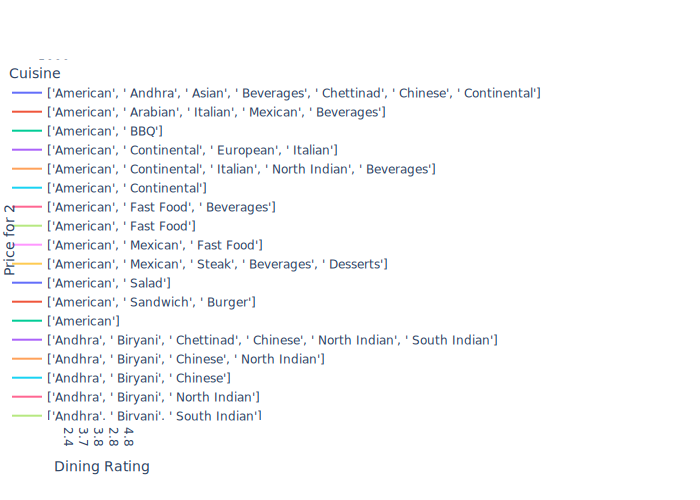

In [24]:
fig = px.line(price_rating_df, y="Price for 2", x="Dining Rating",color='Cuisine')
fig.show()

# Q9) Is there a relation between Location and Price?

In [25]:
location_price_df = zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index()
location_price_df

Location  Price for 2
0     InterContinental Chennai Mahabalipuram Resort...  1500.000000
1                                        Abhiramapuram   228.571429
2                          Abu Sarovar Portico, Egmore  1000.000000
3                                           Adambakkam   291.025641
4                                                Adyar   443.550000
..                                                 ...          ...
263                              Vivira Mall, Navallur   500.000000
264                                       Washermenpet   291.735537
265             WelcomHotel, RK Salai (Cathedral Road)  2075.000000
266                                      West Mambalam   267.846154
267                     Zone by The Park, Pallikaranai  1633.333333

[268 rows x 2 columns]

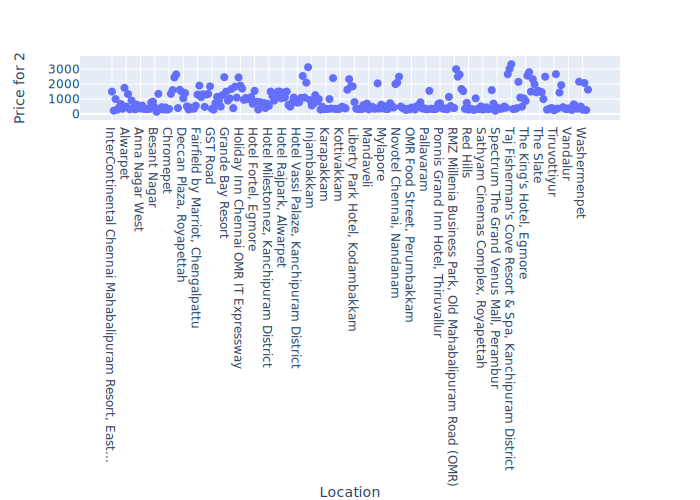

In [27]:
fig = px.scatter(location_price_df, x="Location", y="Price for 2").update_traces(marker_size=8)
fig.show()

# # The criteria for Affordable Restaurants would be:-
1) Low Price 2) High Rated
First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
Let me explain:-The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the
restaurants that are 1/4th of 6000

In [28]:
max_price = zomato_df['Price for 2'].max()
one_fourth_price = max_price/4
one_fourth_price

1250.0

In [31]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
aff_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Top Dishes']]
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] <= 1250]
aff_rest_df.sort_values(by='Price for 2', inplace=True)
aff_rest_df


Name of Restaurant  Price for 2  \
4685             Soda Hub         40.0   
6854          Planet Soda         50.0   
7405  Indian Coffee House         50.0   
8355             Kaafemaa         50.0   
1448           Mamee Soup         60.0   
...                   ...          ...   
6746       Biryani Centre       1200.0   
165        Copper Chimney       1200.0   
316      Prive Restaurant       1200.0   
3697               Zhouyu       1200.0   
644    Coastline Hide Out       1200.0   

                                                Cuisine  \
4685                                      ['Beverages']   
6854                           ['Beverages', ' Juices']   
7405                           ['Beverages', ' Juices']   
8355                                      ['Beverages']   
1448                                   ['Healthy Food']   
...                                                 ...   
6746                                        ['Biryani']   
165   ['North Indian', ' Arabian', ' Biryani', ' Mug...   
316   ['North Indian', ' Continental', ' Mexican', '...   
3697                                          ['Asian']   
644   ['Continental', ' Beverages', ' BBQ', ' Chines...   

                            Location  \
4685       OMR Food Street, Navallur   
6854  OMR Food Street, Kandanchavadi   
7405                          Vepery   
8355                        Ambattur   
1448                   West Mambalam   
...                              ...   
6746                      Triplicane   
165                      Gopalapuram   
316                         Mylapore   
3697                        Alwarpet   
644                          Akkarai   

                                             Top Dishes  
4685                                            Invalid  
6854                                            Invalid  
7405                                            Invalid  
8355                                            Invalid  
1448              ['Herbal Soup', ' French Onion Soup']  
...                                                 ...  
6746                                            Invalid  
165   ['Paneer Tikka', ' Naan', ' Dal Makhani', ' Ru...  
316   ['Dal Makhani', ' Nachos', ' Pasta', ' Hot Cho...  
3697                                            Invalid  
644   ['Cocktails', ' Fries', ' Brownie', ' Mocktail...  

[11740 rows x 5 columns]